# EDA

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사   
carrier_deay : 항공사 지연 요인   
atc_delay : ATC 항공교통관제 지연 요인   
weather_delay : 날씨로 인한 지연 요인

In [66]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("./data/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [69]:
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [ ]:
df_na = df[df['pct_atc_delay'].isna() == True]

fig = plt.figure(figsize=(15, 5))
plt.bar(x=df_na['airline'])

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
# 앞으로 할 분석에 대해 결측치 의 경우 필요없음, 전부 NAN 이기 때문에 삭제.


df = df.dropna()

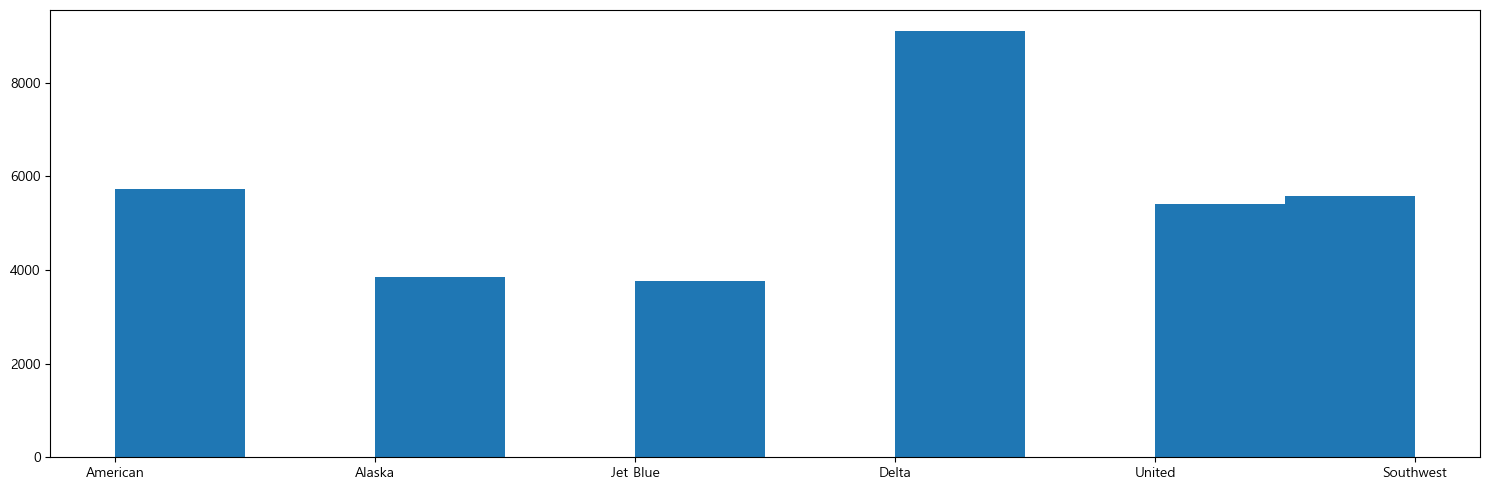

In [ ]:
"""

Delta 항공의 지연비율이 제일 높다.

이 데이터가 전체라는 가정을 가지면, Delta 항공의 경우 지연될 가능성이 높으니 기피 항공사일 확률이 높다.


"""



fig = plt.figure(figsize=(15, 5))
plt.hist(x=df['airline'])
plt.tight_layout()

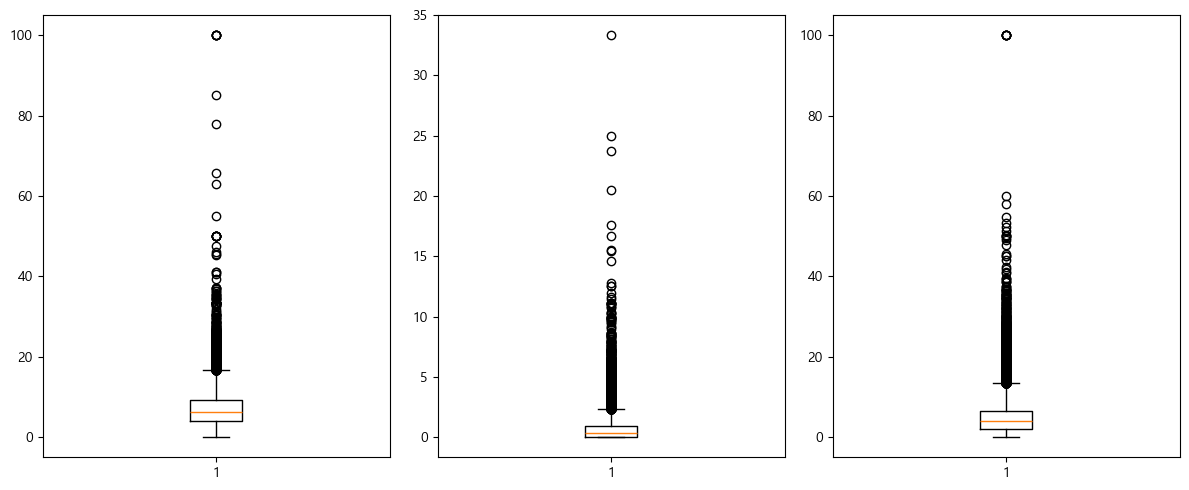

In [ ]:
"""

    항공사 문제가 아니라면 일단 출발하기는 한다. 아무리 늦어도...

"""
a = ['pct_carrier_delay', 'pct_weather_delay', 'pct_atc_delay']

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.boxplot(x=df['pct_carrier_delay'])
ax2.boxplot(x=df['pct_weather_delay'])
ax3.boxplot(x=df['pct_atc_delay'])


plt.tight_layout()
plt.show()

<Axes: title={'center': 'pct_atc_delay'}, xlabel='airline'>

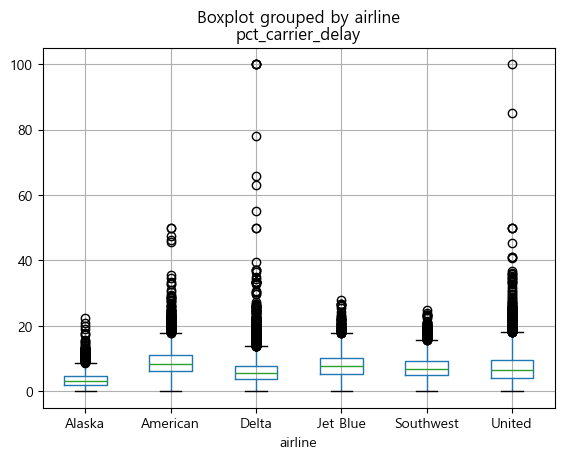

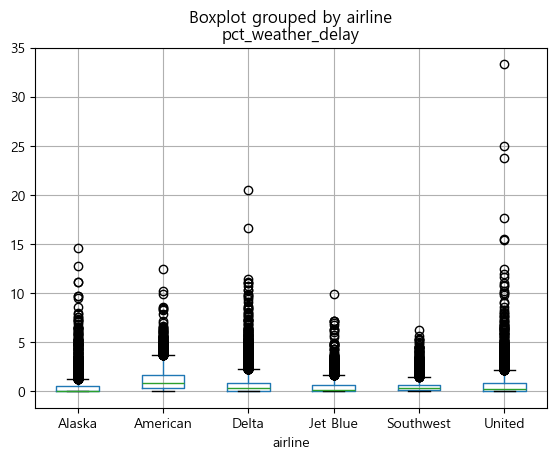

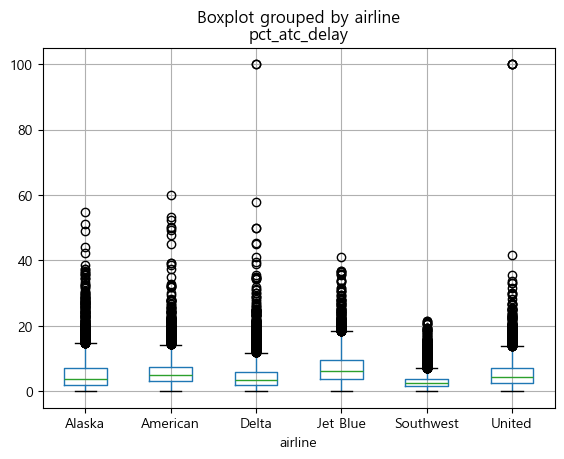

In [ ]:

df.boxplot(by='airline', column='pct_carrier_delay')
df.boxplot(by='airline', column='pct_weather_delay')
df.boxplot(by='airline', column='pct_atc_delay')

In [ ]:
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [ ]:
"""

    날씨 때문에 관제탑에서 지연 시킬 확률은 높다.
    날씨가 안좋으면 지연 가능성이 높다.

"""

df2 = df.drop(columns='airline')
df2.corr()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


In [ ]:
"""

    Delta, Jet blue 특히 항공사의 경우가 날씨 때문에 관제탑에서 지연 시킬 가능 성이 더 높게 나타났다.

"""


df_corr = df.groupby('airline').corr()
df_corr

pct_carrier_delay  pct_atc_delay  \
airline                                                         
Alaska    pct_carrier_delay           1.000000       0.067008   
          pct_atc_delay               0.067008       1.000000   
          pct_weather_delay           0.026046       0.031309   
American  pct_carrier_delay           1.000000       0.104717   
          pct_atc_delay               0.104717       1.000000   
          pct_weather_delay           0.078642       0.027266   
Delta     pct_carrier_delay           1.000000       0.170228   
          pct_atc_delay               0.170228       1.000000   
          pct_weather_delay           0.163264       0.080593   
Jet Blue  pct_carrier_delay           1.000000       0.152636   
          pct_atc_delay               0.152636       1.000000   
          pct_weather_delay           0.158197       0.082693   
Southwest pct_carrier_delay           1.000000       0.210296   
          pct_atc_delay               0.210296       1.000000   
          pct_weather_delay           0.159175       0.603584   
United    pct_carrier_delay           1.000000       0.144685   
          pct_atc_delay               0.144685       1.000000   
          pct_weather_delay           0.165321       0.046689   

                             pct_weather_delay  
airline                                         
Alaska    pct_carrier_delay           0.026046  
          pct_atc_delay               0.031309  
          pct_weather_delay           1.000000  
American  pct_carrier_delay           0.078642  
          pct_atc_delay               0.027266  
          pct_weather_delay           1.000000  
Delta     pct_carrier_delay           0.163264  
          pct_atc_delay               0.080593  
          pct_weather_delay           1.000000  
Jet Blue  pct_carrier_delay           0.158197  
          pct_atc_delay               0.082693  
          pct_weather_delay           1.000000  
Southwest pct_carrier_delay           0.159175  
          pct_atc_delay               0.603584  
          pct_weather_delay           1.000000  
United    pct_carrier_delay           0.165321  
          pct_atc_delay               0.046689  
          pct_weather_delay           1.000000

### by GPT

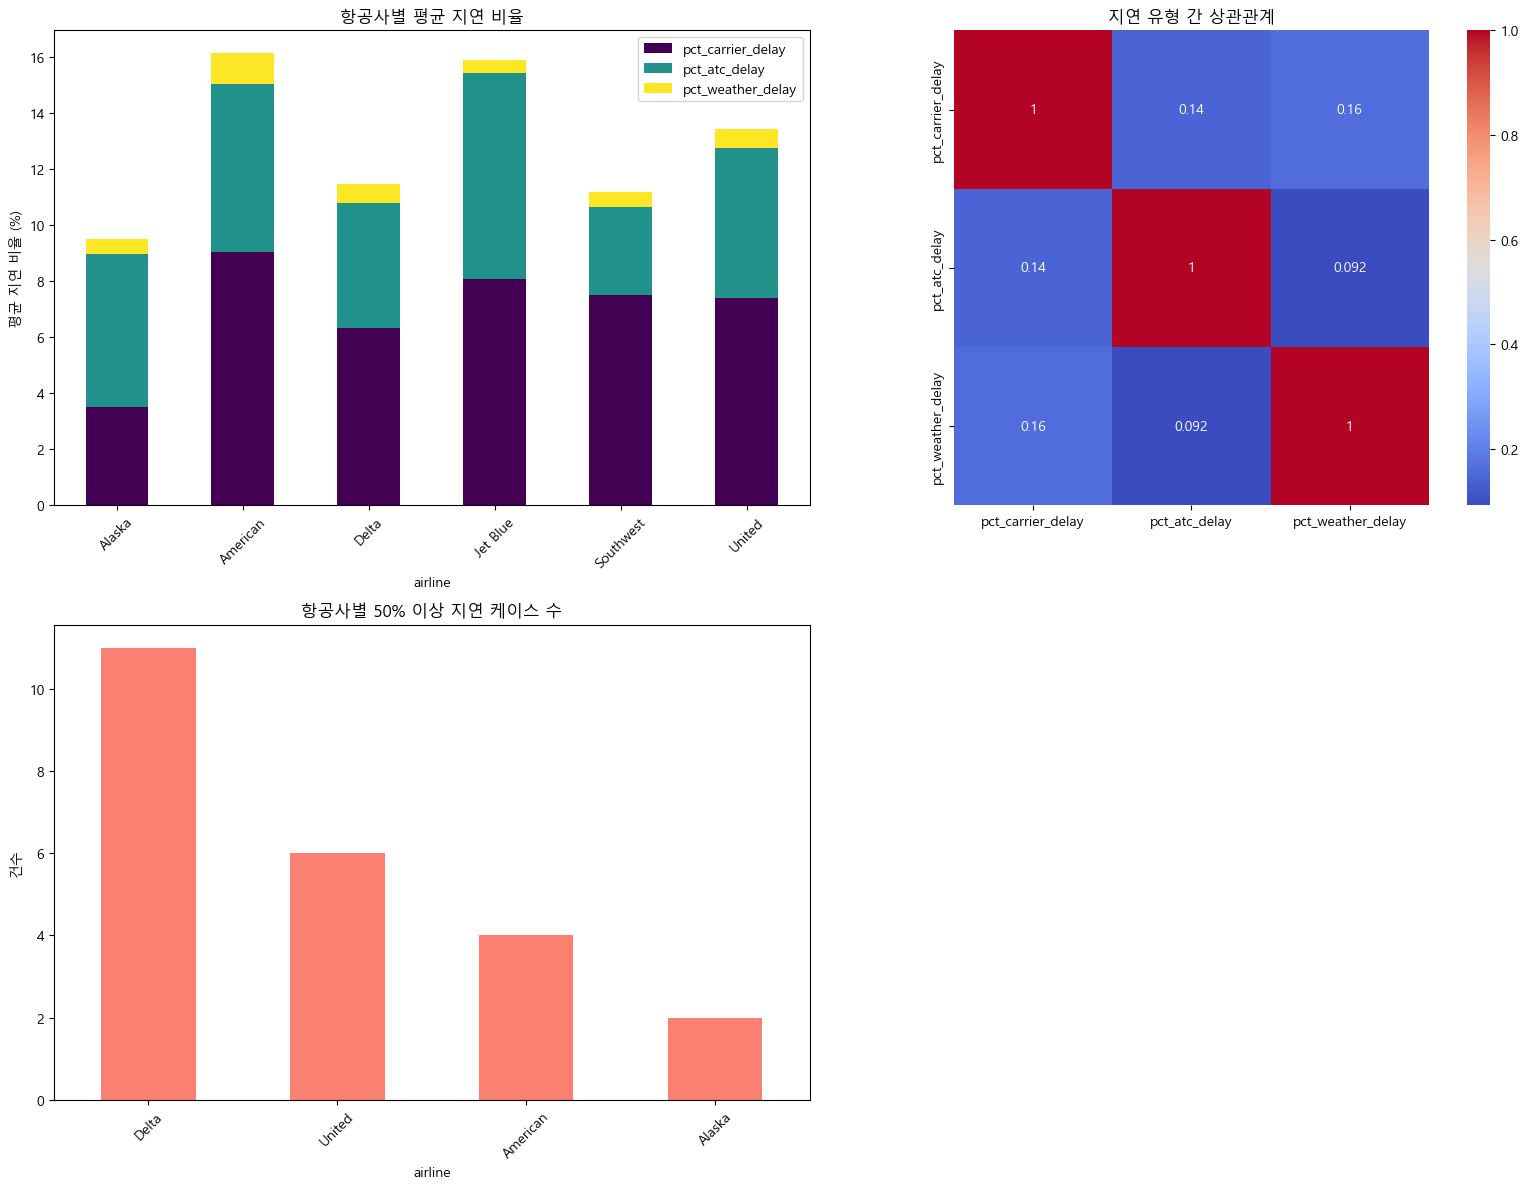

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 제거
df_clean = df.dropna()

# 항공사별 평균 지연 비율 계산
airline_means = df_clean.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

# 지연 유형 간 상관관계
correlation_matrix = df_clean[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()

# 50% 이상 지연 케이스
extreme_cases = df_clean[
    (df_clean['pct_carrier_delay'] > 50) |
    (df_clean['pct_atc_delay'] > 50) |
    (df_clean['pct_weather_delay'] > 50)
]

# 항공사별 Extreme Case 수
extreme_counts = extreme_cases['airline'].value_counts()

# 시각화 준비
plt.figure(figsize=(16, 12))

# 1. 항공사별 평균 지연 비율
plt.subplot(2, 2, 1)
airline_means.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("항공사별 평균 지연 비율")
plt.ylabel("평균 지연 비율 (%)")
plt.xticks(rotation=45)

# 2. 지연 유형 간 상관관계
plt.subplot(2, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("지연 유형 간 상관관계")

# 3. 50% 이상 지연 케이스 수
plt.subplot(2, 2, 3)
extreme_counts.plot(kind='bar', color='salmon')
plt.title("항공사별 50% 이상 지연 케이스 수")
plt.ylabel("건수")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
